# Context
# It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
credit_df = pd.read_csv("creditcard.csv")
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Exploratory Data Analysis

In [3]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_df.shape

(284807, 31)

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Univariant Analysis

Class 0 Percentage: 99.83%
Class 1 Percentage: 0.17%


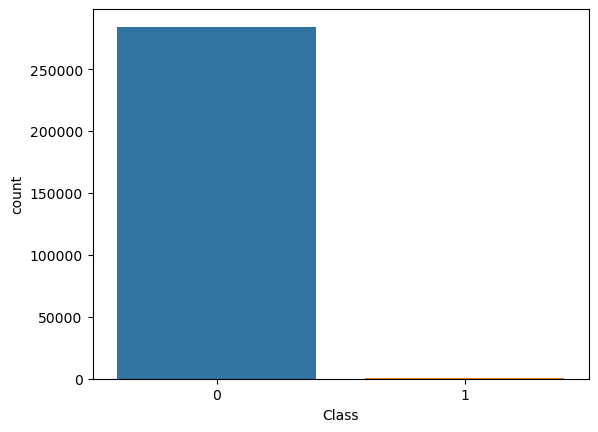

In [8]:
sns.countplot(credit_df["Class"])
# Assuming you have a DataFrame called 'credit_df' with a binary class column named 'Class'
class_counts = credit_df['Class'].value_counts()
total_samples = len(credit_df)

# Calculate the percentage of each class
percentage_class_0 = (class_counts[0] / total_samples) * 100
percentage_class_1 = (class_counts[1] / total_samples) * 100

print(f'Class 0 Percentage: {percentage_class_0:.2f}%')
print(f'Class 1 Percentage: {percentage_class_1:.2f}%')

In [9]:
(credit_df["Class"].value_counts()/len(credit_df))*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Bivariant Analysis

<AxesSubplot:xlabel='Class', ylabel='Amount'>

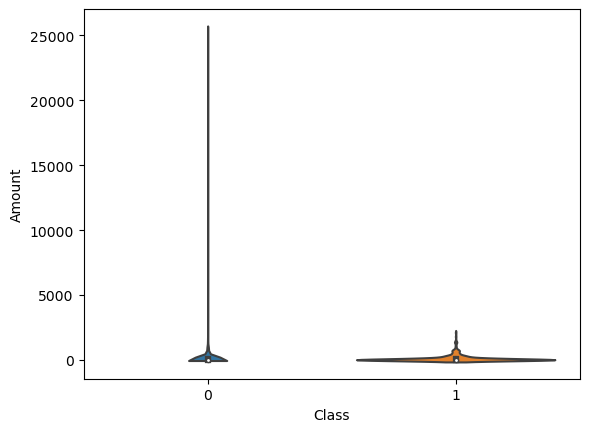

In [10]:
sns.violinplot(data = credit_df, x = "Class", y = "Amount")

In [11]:
pd.crosstab(credit_df["Class"],credit_df["Amount"].sum())

col_0,25162590.01
Class,
0,284315
1,492


In [12]:
fraud = credit_df[credit_df["Class"] == 0]
legit = credit_df[credit_df["Class"] == 1]

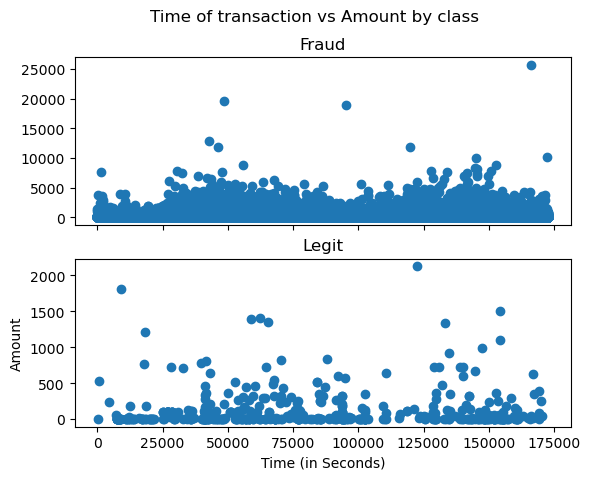

In [13]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [14]:
credit_df.duplicated().sum()

1081

In [15]:
credit_df.drop_duplicates(inplace = True)

In [16]:
credit_df.shape

(283726, 31)

In [17]:
cols = credit_df.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

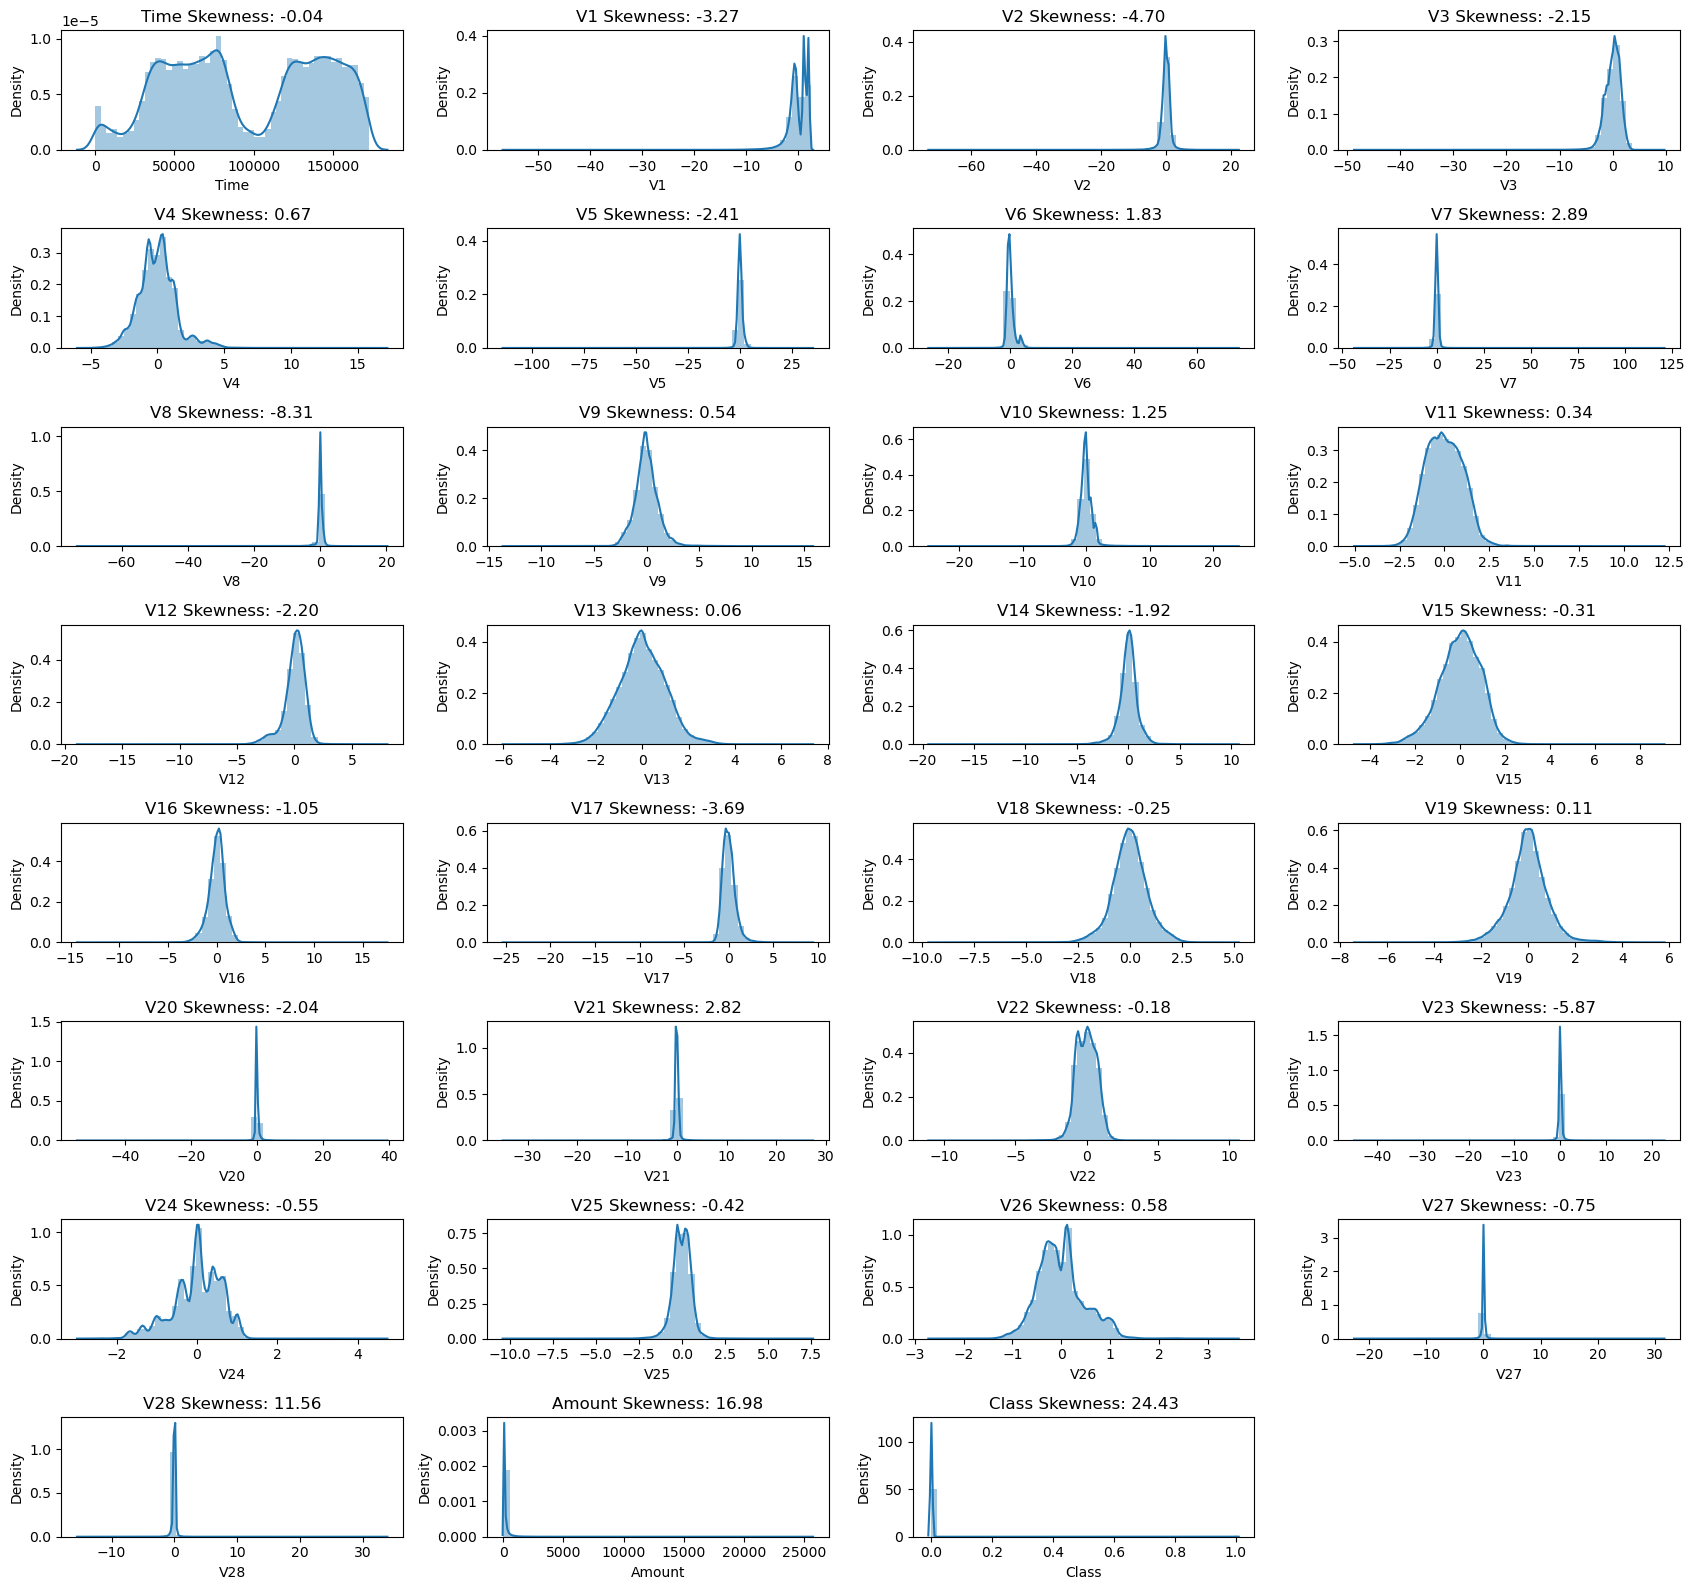

In [18]:
# skewness of individual features
k = 0
num_rows = 8  # Change this to the desired number of rows
num_cols = 4  # Change this to the desired number of columns

plt.figure(figsize=(17, 2 * num_rows))  # Adjust the figure size based on the number of rows

for col in cols:
    k += 1
    plt.subplot(num_rows, num_cols, k)
    sns.distplot(credit_df[col])
    plt.title(f'{col} Skewness: {credit_df[col].skew():.2f}')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


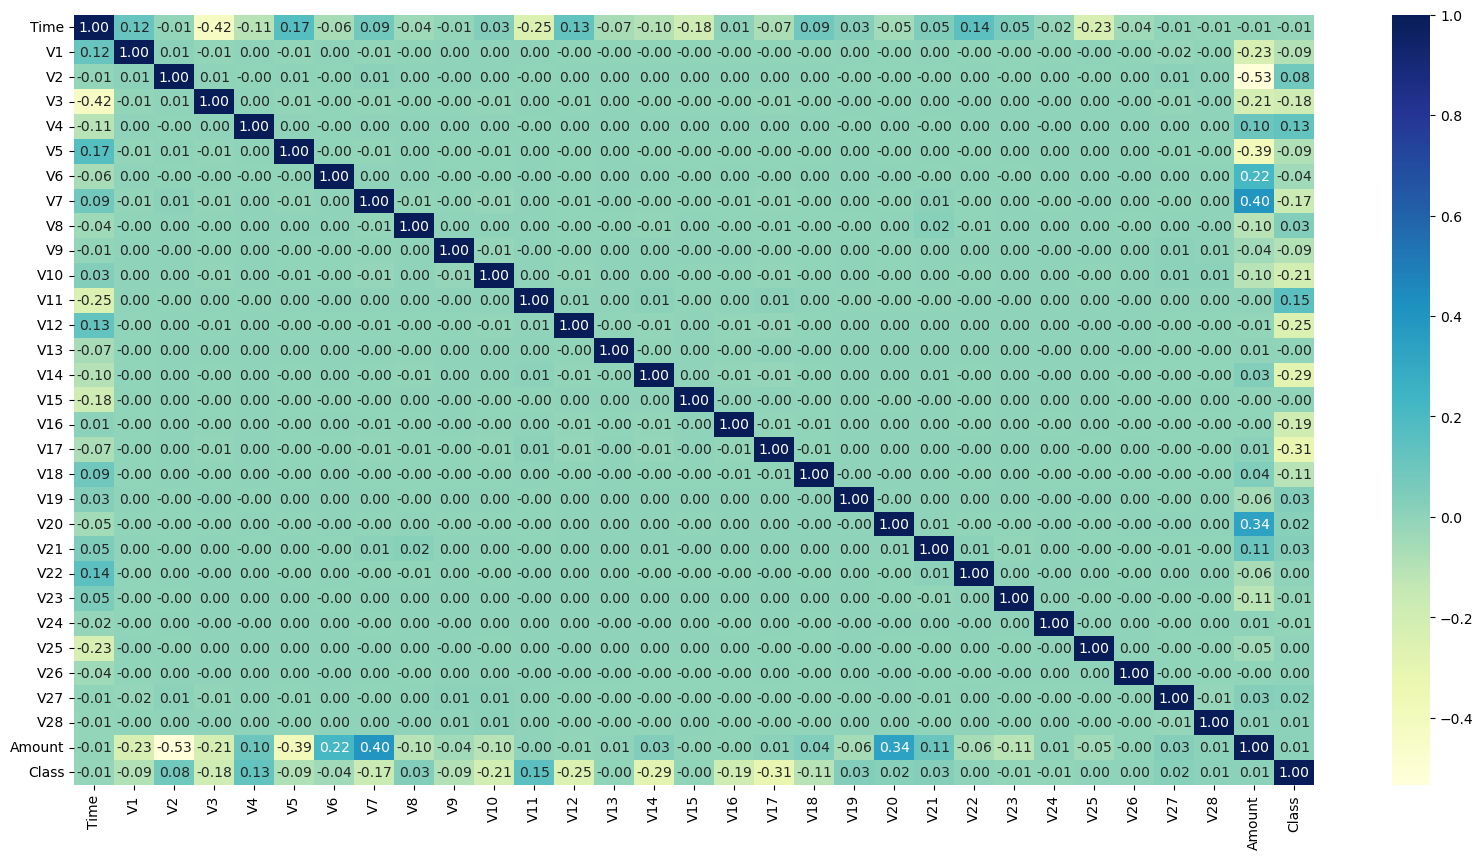

In [19]:
# Let's see the correlation between different variables
plt.figure(figsize=(20,10))
sns.heatmap(credit_df.corr(),cmap="YlGnBu",annot=True,fmt=".2f")
plt.show()

# Separating the features and target

In [20]:
X = credit_df.drop("Class",axis=1)
Y = credit_df["Class"]

In [21]:
print(X.shape,Y.shape)

(283726, 30) (283726,)


# Up_sampling (SMOTE) the Imbalance data

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smote = SMOTE(random_state = 123)
X_sm, Y_sm = smote.fit_resample(X,Y)

In [24]:
print(X_sm.shape,Y_sm.shape)

(566506, 30) (566506,)


In [25]:
# Now classes are balanced
Y_sm.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

# Standardization

In [26]:
# Scaling
sc = StandardScaler()
X_sm_sc = sc.fit_transform(X_sm)

# Train_test_split

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X_sm_sc,Y_sm,test_size = 0.2, random_state = 42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(453204, 30) (113302, 30) (453204,) (113302,)


# Model Training

# Logistic Regression

In [28]:
model_lr = LogisticRegression()
model_lr.fit(X_train,Y_train)

LogisticRegression()

In [29]:
train_preds_lr = model_lr.predict(X_train)
test_preds_lr = model_lr.predict(X_test)

In [30]:
print(classification_report(Y_train,train_preds_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    226790
           1       0.99      0.97      0.98    226414

    accuracy                           0.98    453204
   macro avg       0.98      0.98      0.98    453204
weighted avg       0.98      0.98      0.98    453204



In [31]:
print(classification_report(Y_test,test_preds_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56463
           1       0.99      0.97      0.98     56839

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302



# ROC Curve

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def draw_roc(actual,predicted):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(actual,predicted)
    
    # Calculate the AUC (Area Under the Curve)
    auc_score = auc(fpr, tpr)
    
    # roc_auc_score
    roc_auc = roc_auc_score(actual,predicted)
    
    #plot the ROC curve
    plt.figure(figsize =(5,5))
    plt.plot(fpr,tpr,label = "ROC Curve (area = %0.2f)" % roc_auc)
    plt.plot([0,1],[0,1],color ="navy", lw = 2, linestyle = "--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate/Sensitivity/Recall")
    plt.title("ROC Curve")
    plt.legend(loc ="lower right")
    plt.show()

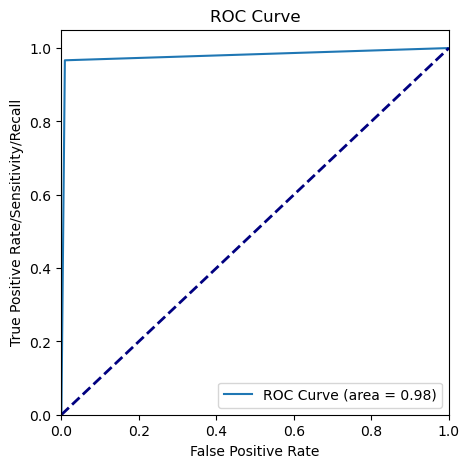

In [33]:
draw_roc(Y_train,train_preds_lr)

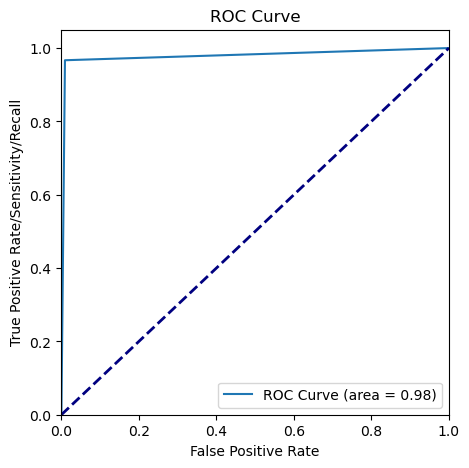

In [34]:
draw_roc(Y_test,test_preds_lr)

# RandomForestClassifier

In [35]:
model_rf = RandomForestClassifier()

In [36]:
model_rf.fit(X_train,Y_train)

RandomForestClassifier()

In [37]:
train_preds_rf = model_rf.predict(X_train)
test_preds_rf = model_rf.predict(X_test)

In [38]:
print(classification_report(Y_train,train_preds_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226790
           1       1.00      1.00      1.00    226414

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204



In [39]:
print(classification_report(Y_test,test_preds_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



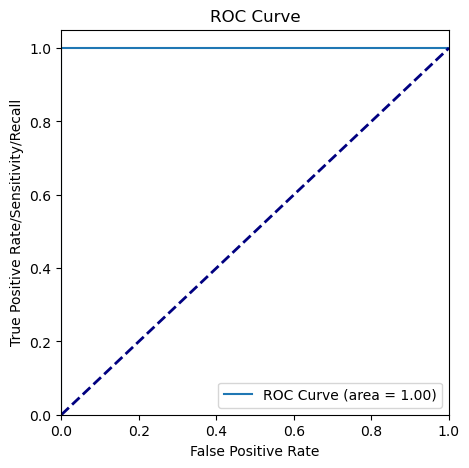

In [40]:
draw_roc(Y_train,train_preds_rf)

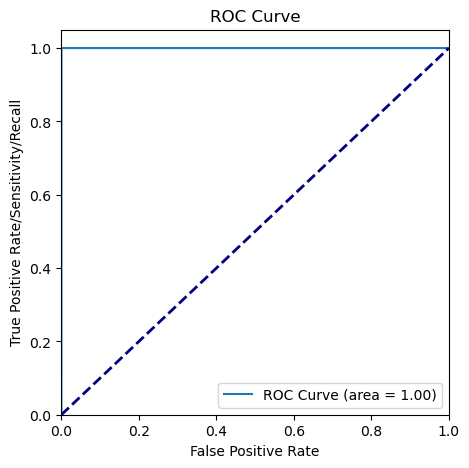

In [41]:
draw_roc(Y_test,test_preds_rf)